In [3]:
!unzip /content/OMS-main.zip

Archive:  /content/OMS-main.zip
fa489139df25c0b3c935965c427f71d197f6b55c
   creating: OMS-main/
  inflating: OMS-main/README.md      
   creating: OMS-main/analise_exploratoria/
  inflating: OMS-main/analise_exploratoria/consumo_alcool.py  
  inflating: OMS-main/analise_exploratoria/correlacao_mapa.py  
  inflating: OMS-main/analise_exploratoria/expectativa_scaterplot.py  
  inflating: OMS-main/analise_exploratoria/tendencia_varias_variaveis.py  
  inflating: OMS-main/analise_exploratoria/visualizacao_expectativa_vida.py  
   creating: OMS-main/dataset/
  inflating: OMS-main/dataset/dataset_LE.csv  
  inflating: OMS-main/dataset/leitura_dataset.py  
  inflating: OMS-main/main.py        
   creating: OMS-main/modelos/
  inflating: OMS-main/modelos/avaliacao_modelo.py  
  inflating: OMS-main/modelos/modelagaem_expectativa_vida.py  
   creating: OMS-main/preprocessamento/
   creating: OMS-main/preprocessamento/analise/
  inflating: OMS-main/preprocessamento/analise/dataframe_final.py  
  

In [4]:
import sys
import importlib.util

# Adiciona o caminho principal do projeto ao sys.path
sys.path.append('/content/OMS-main')





In [5]:
from dataset.leitura_dataset import LeitorDataset
from modelos.modelagaem_expectativa_vida import ExpectativaVidaMLP
from analise_exploratoria.consumo_alcool import ConsumoAlcool
from analise_exploratoria.correlacao_mapa import MatrizRelacao
from analise_exploratoria.expectativa_scaterplot import VisualizacaoScaterPlot
from analise_exploratoria.tendencia_varias_variaveis import TendenciaVariasVariaveis
from analise_exploratoria.visualizacao_expectativa_vida import VisualizadorExpectativaVida
from preprocessamento.analise.dataframe_final import DataFrameFinal
from preprocessamento.analise.duplicatas import Duplicatas
from preprocessamento.analise.valores_ausentes import AnaliseValoresAusentes
from preprocessamento.limpeza.colunas_redundantes import RemovendoColunas
from preprocessamento.limpeza.limpeza_dataset import PreenchendoKNN
from preprocessamento.outliers.outliers import Outlier

In [6]:
leitor_df = LeitorDataset("/content/OMS-main/dataset/dataset_LE.csv")
df = leitor_df.executar_leitura()

✅ Arquivo '/content/OMS-main/dataset/dataset_LE.csv' carregado com sucesso!

📌 Informações do Dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2938 entries, 0 to 2937
Data columns (total 22 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Country                          2938 non-null   object 
 1   Year                             2938 non-null   int64  
 2   Status                           2938 non-null   object 
 3   Life expectancy                  2928 non-null   float64
 4   Adult Mortality                  2928 non-null   float64
 5   infant deaths                    2938 non-null   int64  
 6   Alcohol                          2744 non-null   float64
 7   percentage expenditure           2938 non-null   float64
 8   Hepatitis B                      2385 non-null   float64
 9   Measles                          2938 non-null   int64  
 10   BMI                             2904 non

In [7]:
dupli = Duplicatas(df)
dupli.executar_analise_duplicatas()

🔍 Total de registros duplicados considerando ['Country', 'Year']: 0

📊 Contagem de valores únicos por coluna categórica:
Country    193
Status       2
dtype: int64


In [8]:
valor_n = AnaliseValoresAusentes(df)
valor_n.executar_analise_valores_ausentes()


📉 Contagem de valores ausentes por coluna:
Country                              0
Year                                 0
Status                               0
Life expectancy                     10
Adult Mortality                     10
infant deaths                        0
Alcohol                            194
percentage expenditure               0
Hepatitis B                        553
Measles                              0
 BMI                                34
under-five deaths                    0
Polio                               19
Total expenditure                  226
Diphtheria                          19
 HIV/AIDS                            0
GDP                                448
Population                         652
 thinness  1-19 years               34
 thinness 5-9 years                 34
Income composition of resources    167
Schooling                          163
dtype: int64

🌍 Países com valores ausentes: ['Algeria', 'Angola', 'Antigua and Barbuda', 'Argenti

In [9]:
outli = Outlier(df)
df1 = outli.executar_outliers()

✅ Outliers removidos e interpolação aplicada com sucesso.


In [10]:
valor_ause = PreenchendoKNN(df1)
df2 = valor_ause.executar_limpeza_dados()

✅ Imputação KNN aplicada com sucesso utilizando 20 vizinhos.


In [11]:
final = DataFrameFinal(df2)
df3 = final.executar_analise_dataframe_final()


✅ DataFrame final sem valores ausentes:


In [12]:
visualizar = VisualizadorExpectativaVida(df3)
visualizar.executar_visualizacao_tendencia_vida()

In [13]:
tendencia = TendenciaVariasVariaveis(df3)
tendencia.executar_visualizacao_varias_variaveis()

In [14]:
alcool = ConsumoAlcool(df3)
alcool.executar_visualizacao_consumo_alcool()

In [15]:
scatter = VisualizacaoScaterPlot(df3)
scatter.executar_visualizar_correlacao_bmi_vida()


📊 Matriz de Correlação Calculada:

📊 Matriz de Correlação Calculada:

🔥 Correlações Significativas (>|0.50|):

📊 Matriz de Correlação Calculada:

🔥 Correlações Significativas (>|0.50|):


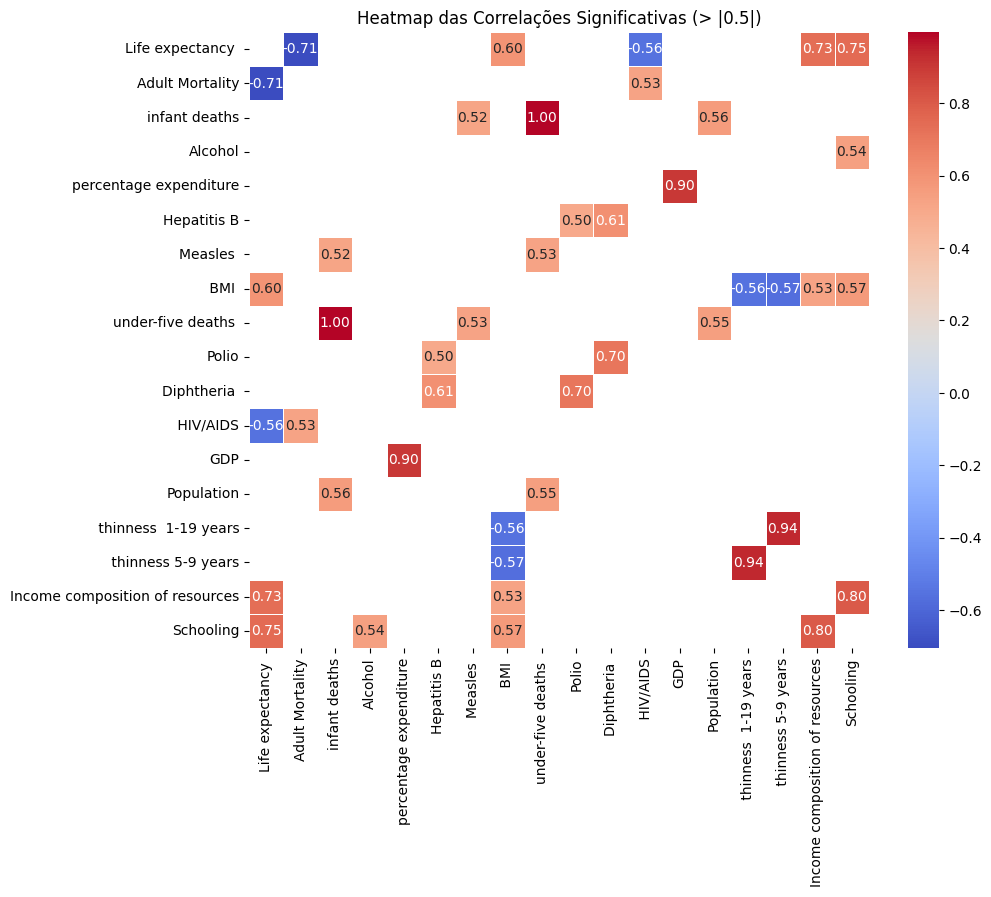

In [16]:
matriz = MatrizRelacao(df3)
matriz.executar_matriz_relacao()

In [17]:
colunas = RemovendoColunas(df3)
df4 = colunas.executar_remover_colunas()

✅ Removidas as colunas: [' thinness 5-9 years', 'percentage expenditure', 'under-five deaths ', 'Diphtheria ', 'Income composition of resources']


In [ ]:
rede = ExpectativaVidaMLP(df4)
rede.executar_pipeline()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.




🔄 Compilando o modelo...

📊 Iniciando o treinamento do modelo...
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.

